k최근접 이웃의 한계 : 

In [1]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [11]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [13]:
print(train_input.shape, test_input.shape, train_target.shape, test_target.shape)
# 현재 데이터 상태는 1차원 형태로 두가지 특성이 합쳐지지 않은 특성을 가지고 있다.
print(train_input)
print(train_target)

(42,) (14,) (42,) (14,)
[19.6 22.  18.7 17.4 36.  25.  40.  39.  43.  22.  20.  22.  24.  27.5
 43.  40.  24.  21.  27.5 40.  32.8 26.5 36.5 13.7 22.7 15.  37.  35.
 28.7 23.5 39.  21.  23.  22.  44.  22.5 19.  37.  22.  25.6 42.  34.5]
[  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.   85.  130.
  225.  260. 1100.  900.  145.  115.  265. 1015.  514.  218.  685.   32.
  145.   40.  690.  840.  300.  170.  650.  110.  150.  110. 1000.  150.
   80.  700.  120.  197. 1100.  556.]


In [17]:
# reshape을 통해서 2차원 배열로 만들어 두 특성을 합쳐야한다.
# 우선 한가지 특성
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)
# print(train_input)
# 1차원 배열에서 2차원 배열로 변경되었다.

(42, 1) (14, 1)


In [18]:
from sklearn.neighbors import KNeighborsRegressor as knr

# 모델 학습
knr  = knr(n_neighbors=3)
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [19]:
# 모델 예측
knr.predict([[50]])
# 에측한 결과값 보다 농어의 무게는 더 많이 나간다고 한다.
# 즉 잘못 학습된 모델이다.

array([1033.33333333])

[[6. 7. 7.]] [[34  8 14]]


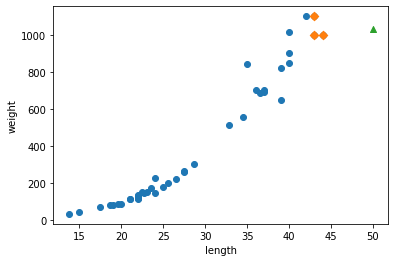

In [26]:
from operator import length_hint
import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)

# 50cm 농어의 예측된 이웃을 구한다.
# 주변 이웃 인덱스 여러개를 배열 형태로 반환한다.
distance, indexes = knr.kneighbors([[50]])
print(distance, indexes)

# 이웃을 표기
plt.scatter(train_input[indexes], train_target[indexes], marker ='D')
plt.scatter(50,1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

최근접 이웃 알고리즘은 이웃의 개수를 3개로 설정했기 때문에 이웃의 무게의 평균값으로 예측값을 도출한다.

In [27]:
print(np.mean(train_target[indexes]))
# 주변 이웃의 평균값을 구하면 예측한 결과외 동일한 결과가 나오는 것을 확인 할 수 있다.

1033.3333333333333


따라서 최근접 이웃 알고이리즘은 학습한 데이터의 범위를 벗어나는 데이터의 결과를 예측할때는 엉뚱한 값을 예측할 수 있다는 한계가 있다.

In [28]:
knr.predict([[100]])
# 100cm도 동일하게 1033으로 인식한다.

array([1033.33333333])

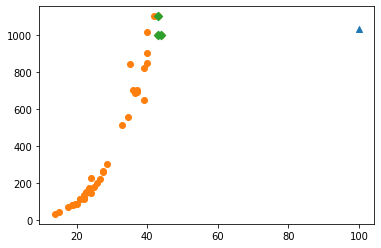

In [31]:
plt.scatter(100, 1033, marker = '^')
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.show()

### 최근접 이웃 알고리즘의 한계를 어떤 알고리즘으로 극복할 수 있을까? **선형회귀**를 통해서 해결할 수 있다.

In [32]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()

# 선형회귀 모델을 학습합니다.
lr.fit(train_input, train_target)

# 모델을 예측해 봅니다.
predict = lr.predict([[50]])
print(predict)

[1241.83860323]


[39.01714496] -709.0186449535477


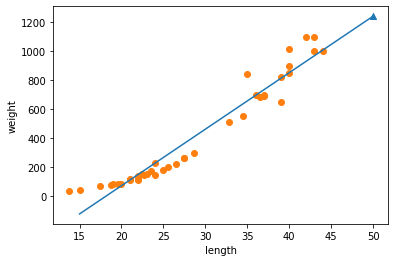

In [35]:
print(lr.coef_, lr.intercept_)
# coef 가중치 또는 기울기
#coef, intercept를 모델 파라미터라고 부른다.
# 머신러닝의 훈련과정은 이러한 모델 파라미터를 최적화된 값을 찾는 것 이다.

plt.scatter(50, 1241, marker='^')
plt.scatter(train_input, train_target)

# 15부터 50까지 1차 방정식 그래프를 그린다.
plt.plot([15,50], [lr.coef_*15 + lr.intercept_, lr.coef_*50 + lr.intercept_])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

선형회귀의 모델 파라미터 : coef(기울기), intercept(절편)

y = a * x + b

a = coef 

b = intercept

In [37]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))
# 현재 train data set의 점수가 더 많이 나오는 상태이지만 train 세트의 점수도 그리 높지 않은 것을 볼수 있다. 
# 때문에 이 것은 과소적합되었다고 볼 수 이다.

0.939846333997604
0.8247503123313558


하지만 위 그래프를 보면 왼쪽 아래가 살짝 정확하지 않은 것 처럼 보인다.

이 현상을 해결하는 다른 방법에 대해서 알아보겠다.

In [ ]:
# 선형회귀는 가장 단순한 직선을 찾는다고 생각하면되고 다항회귀는 가장 적합한 곡선을 찾는 다고 생각하면된다.
# 다항회귀
# 2차 방정식 a*x**2 + b*x + c = y
# 2차 방정식을 만들기 위해 아래와 같은 형태의 np array를 만들어 보겠습니다.

|길이 제곱|길이|
|--|--|
|384.16|19.6|
|484|22|

In [50]:
# numpy 및에 있는 column_stack을 활용하면 쉽게 만들 수 있습니다.
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))
print(train_poly.shape,train_poly)
print('======================')
print(test_poly.shape, test_poly)
# 2차원 베열의 형태로 열을 추가 시켜줬다.
# --(행), |(열)

(42, 2) [[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]
 [ 625.     25.  ]
 [1600.     40.  ]
 [1521.     39.  ]
 [1849.     43.  ]
 [ 484.     22.  ]
 [ 400.     20.  ]
 [ 484.     22.  ]
 [ 576.     24.  ]
 [ 756.25   27.5 ]
 [1849.     43.  ]
 [1600.     40.  ]
 [ 576.     24.  ]
 [ 441.     21.  ]
 [ 756.25   27.5 ]
 [1600.     40.  ]
 [1075.84   32.8 ]
 [ 702.25   26.5 ]
 [1332.25   36.5 ]
 [ 187.69   13.7 ]
 [ 515.29   22.7 ]
 [ 225.     15.  ]
 [1369.     37.  ]
 [1225.     35.  ]
 [ 823.69   28.7 ]
 [ 552.25   23.5 ]
 [1521.     39.  ]
 [ 441.     21.  ]
 [ 529.     23.  ]
 [ 484.     22.  ]
 [1936.     44.  ]
 [ 506.25   22.5 ]
 [ 361.     19.  ]
 [1369.     37.  ]
 [ 484.     22.  ]
 [ 655.36   25.6 ]
 [1764.     42.  ]
 [1190.25   34.5 ]]
(14, 2) [[  70.56    8.4 ]
 [ 324.     18.  ]
 [ 756.25   27.5 ]
 [ 453.69   21.3 ]
 [ 506.25   22.5 ]
 [1600.     40.  ]
 [ 900.     30.  ]
 [ 605.16   24.6 ]
 [1521.     39.  ]
 [ 441.     21

[1573.98423528]
[  1.01433211 -21.55792498] 116.0502107827827


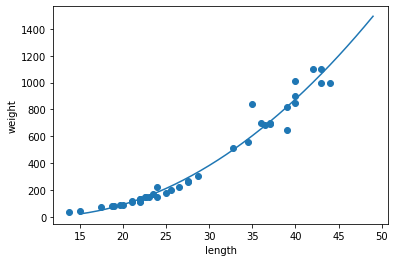

In [53]:
# 학습할 때는 위에서 마든 배열의 형태외 같이 원래 길이와 제곱한 길이를 모두 넝어준다.
lr.fit(train_poly, train_target)
result = lr.predict([[50 ** 2, 50]])
print(result)
print(lr.coef_, lr.intercept_)
plt.scatter(train_input, train_target)
a = lr.coef_[0]
b = lr.coef_[1]
c = lr.intercept_
point = np.arange(15,50)
plt.plot(point, a*point**2 + b*point + c)
plt.xlabel('length')
plt.ylabel('weight')
plt.show() 

지금까지는 한가지 특성만을 사용하여 결과를 예측하였는데 앞으로는 여러 특성을 가지고 모델을 만드는 방법에 대해 알아보겠습니다.

In [55]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


테스트 세트와 학습 세트의 점수가 많이 높아졌지만 테스트 점수가 학습 점수가 조금 더 높은 것으로 보아 아직 과소적합이 조금 남아 있는 것으로 보인다.

이는 조금 더 복잡한 모델을 만들어 헤결 할 수 있다.